<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Check-for-nans" data-toc-modified-id="Check-for-nans-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check for nans</a></span></li><li><span><a href="#Age-Analysis" data-toc-modified-id="Age-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Age Analysis</a></span><ul class="toc-item"><li><span><a href="#Plots-using-seaborn" data-toc-modified-id="Plots-using-seaborn-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plots using seaborn</a></span></li></ul></li><li><span><a href="#Gender-Analysis" data-toc-modified-id="Gender-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gender Analysis</a></span></li><li><span><a href="#Histogram-Using-Bokeh" data-toc-modified-id="Histogram-Using-Bokeh-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Histogram Using Bokeh</a></span></li></ul></div>

Author: Bhishan Poudel  
Date: Sep 2, 2018

**Exploratory Data Analysis of Airnb Kaggle Data**

**Age Analysis**
1. Drop NaN values
2. Take age between 18 to 100, inclusive.
3. Convert age 1915 to 100 and 1997 to 18 and discard other large values.

# Imports

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot settings
sns.set(style="darkgrid")
plt.style.use('ggplot')


# Jupyter-notebook settings
%matplotlib inline
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)

In [39]:
! ls ../input/*.csv

ls: ../input/*.csv: No such file or directory


In [40]:
# load data
users = pd.read_csv('input/train_users_2.csv',parse_dates=True)
print(users.shape)
users.head()

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [41]:
# describe
users.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


# Check for nans

In [42]:
users.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

We see a lot of nans for `date_first_booking` `age` and `first_affiliate_tracked`.

# Age Analysis

Here, we see a lot of null values for age. Lets look at the age data.

In [43]:
np.random.seed(100)
users.age.sample(6)

192306    32.0
176846    21.0
17480     46.0
15489     25.0
83022      NaN
73149     23.0
Name: age, dtype: float64

In [44]:
# drop na values from age
users['age'] = users['age'].dropna()

In [45]:
users.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

We see age from 1 year to 2014. Looks like if somebody wants to put age 1, they put 2014 for the 2015 data.

We need to be at least age 18 to register airnb account. 

https://www.airbnb.com/terms


Oldest living person is Kane Tanaka of Japan with age 115 years.
https://en.wikipedia.org/wiki/List_of_oldest_living_people


Also, the longest verified living person was Jeane Calment 122 years old of 
France who died in 1997.

https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people

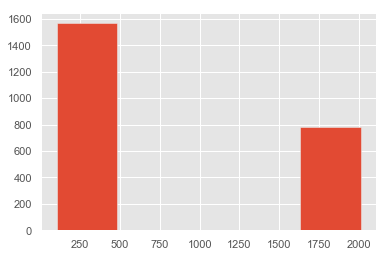

In [46]:
users[users.age>100].age.hist(bins=5)

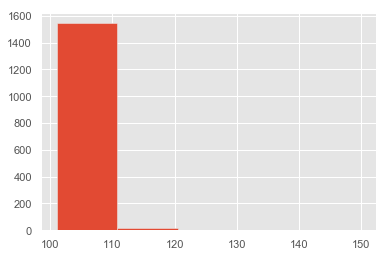

In [47]:
users[ (users.age>100) & (users.age<500) ].age.hist(bins=5)

We see a lot of people put age between 100 and 110. We can't really trust the age
above 100 for so many number of people. We will analyze this data later. But for now,
lets look the age range between above 1000. They might be confused age for the birth year.

In [48]:
users[ (users.age>1000) ].age.value_counts()

2014.0    710
2013.0     39
1932.0      3
1931.0      3
1949.0      3
1924.0      2
1936.0      2
1947.0      2
1929.0      2
1928.0      2
1952.0      1
1938.0      1
1933.0      1
1927.0      1
1942.0      1
1995.0      1
2008.0      1
1953.0      1
1926.0      1
1925.0      1
1935.0      1
Name: age, dtype: int64

The legal age to register airnb is 18 years old. If we assume top age is 100.
The kaggle data for new user booking of airnb is from 2015 and project ended in 2016 feb.
```
Age 100 = 2015 - 100 = 1915
Age 18 = 2015 - 18 = 1997
Age 0 = 2015
```

We will convert the age from the years 1997 to be 18 and 1915 to be 100 and discard all other ages.

Example of age selection:
```
users.loc[users['age'] < 18, 'age'] = np.NaN
users.loc[users['age'] > 100, 'age'] = np.NaN
```

In [49]:
s = users['age'].copy() # note: series.between in inclusive both ends.
s[s.between(1915,1997)] = 2015 - s[s.between(1915,1997)]
users.age = s

In [50]:
users[ (users.age>1000) ].age.value_counts()

2014.0    710
2013.0     39
2008.0      1
Name: age, dtype: int64

In [51]:
users[ (users.age<18) ].age.value_counts().sort_index()

1.0      2
2.0      7
4.0      3
5.0     45
15.0     8
16.0    26
17.0    67
Name: age, dtype: int64

In [52]:
users = users[users.age<=100]

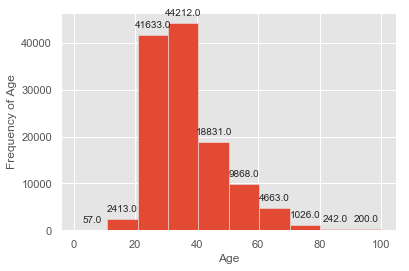

In [53]:
ax = users.age.plot(kind='hist')
ax.set_ylabel('Frequency of Age')
ax.set_xlabel('Age')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=2), 
                (p.get_x()+p.get_width()/2.,
                 p.get_height()), ha='center', 
                va='center', xytext=(0, 10), 
                textcoords='offset points')


In [75]:
## Plots using seaborn

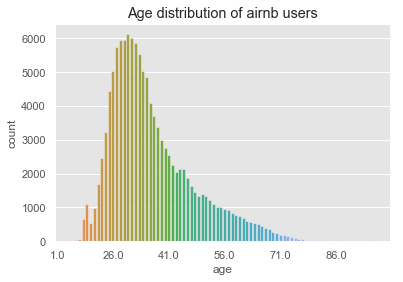

In [76]:
age_plot = sns.countplot(users['age'])
age_plot.set_title('Age distribution of airnb users')
# make the plot visible
for ind, label in enumerate(age_plot.get_xticklabels()):
    if ind % 15 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

In [79]:
age_plot.figure.savefig('outputs/seaborn_age_countplot.png')

# Gender Analysis

In [56]:
users['gender'].value_counts()

FEMALE       56777
MALE         50003
-unknown-    16140
OTHER          225
Name: gender, dtype: int64

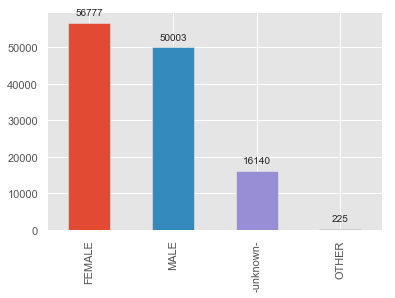

In [57]:
ax = users['gender'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=2), 
                (p.get_x()+p.get_width()/2.,
                 p.get_height()), ha='center', 
                va='center', xytext=(0, 10), 
                textcoords='offset points')

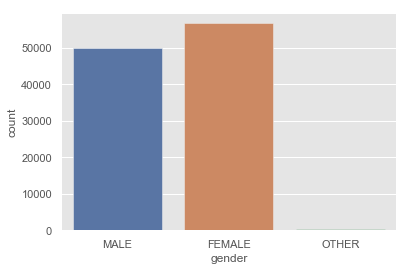

In [58]:
# change unknowns to NaNs
users.loc[users['gender'] == '-unknown-', 'gender'] = np.NaN
sns.countplot(users['gender'],  palette = "deep")

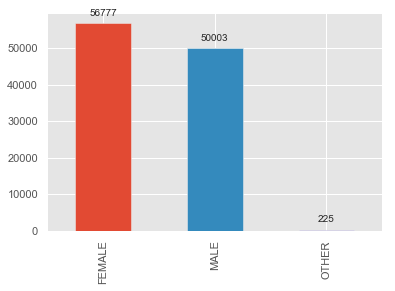

In [59]:
ax = users['gender'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=2), 
                (p.get_x()+p.get_width()/2.,
                 p.get_height()), ha='center', 
                va='center', xytext=(0, 10), 
                textcoords='offset points')

# Histogram Using Bokeh

In [60]:
import pandas as pd
import numpy as np

In [61]:
from bokeh.plotting import figure

from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import Category10_5, Category20_16

In [62]:
users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


In [63]:
users['age'].describe()

count    123145.000000
mean         36.553965
std          11.725716
min           1.000000
25%          28.000000
50%          34.000000
75%          42.000000
max         100.000000
Name: age, dtype: float64

In [64]:
arr_hist, edges = np.histogram(users['age'],bins=9,range = [10, 100])

In [65]:
# Set up the figure
p = figure(plot_width = 500, 
           plot_height = 500, 
           title = 'Histogram of Age Count of Airnb Users',
           x_axis_label = 'Age (years)', 
           y_axis_label = 'Count')

# Add a quad glyph
p.quad(bottom=0, 
       top=arr_hist, 
       left=edges[:-1], 
       right=edges[1:], 
       fill_color='red', 
       line_color='black')

# To show in notebook
output_notebook()

# Show the plot
show(p)

Loading BokehJS ...

In [66]:
# add style
def style(p):
    p.title.align = 'center'
    p.title.text_font_size = '18pt'
    p.xaxis.axis_label_text_font_size = '12pt'
    p.xaxis.major_label_text_font_size = '12pt'
    p.yaxis.axis_label_text_font_size = '12pt'
    p.yaxis.major_label_text_font_size = '12pt'
    
    return p

In [67]:
styled_p = style(p)
show(styled_p)

In [68]:
# Column data source
arr_df = pd.DataFrame({'count': arr_hist, 'left': edges[:-1], 'right': edges[1:]})
arr_df['f_count'] = ['%d people' % count for count in arr_df['count']]
arr_df['f_interval'] = ['%d to %d years' % (left, right) for left, right in zip(arr_df['left'], arr_df['right'])]

arr_df.head()

,count,left,right,f_count,f_interval
0,1872,10.0,20.0,1872 people,10 to 20 years
1,36050,20.0,30.0,36050 people,20 to 30 years
2,47570,30.0,40.0,47570 people,30 to 40 years
3,20210,40.0,50.0,20210 people,40 to 50 years
4,10521,50.0,60.0,10521 people,50 to 60 years


In [69]:
arr_src = ColumnDataSource(arr_df)
arr_src.data.keys()

dict_keys(['count', 'left', 'right', 'f_count', 'f_interval', 'index'])

In [70]:
# Set up the figure same as before
p = figure(plot_width = 500, 
           plot_height = 500, 
           title = 'Airnb Users Age Distribution',
           x_axis_label = 'Age (years)', 
           y_axis_label = 'Count')

# Add a quad glyph with source this time
p.quad(bottom=0, 
       top='count', 
       left='left', 
       right='right', 
       source=arr_src,
       fill_color='red',
       hover_fill_alpha=0.7,
       hover_fill_color='blue',
       line_color='black')

# Add style to the plot
styled_p = style(p)

# Add a hover tool referring to the formatted columns
hover = HoverTool(tooltips = [('Age', '@f_interval'),
                              ('Count', '@f_count')])

# Add the hover tool to the graph
styled_p.add_tools(hover)

# Show the plot
show(styled_p)

In [71]:
from bokeh.io import export_svgs

p.output_backend = "svg"
export_svgs(p, filename="outputs/airnb_age.svg")

['outputs/airnb_age.svg']

In [72]:
from bokeh.io import output_file
output_file("outputs/airnb_age.html")